In [30]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import pandas as pd


In [15]:
Image_size=256
Batch_size=32
channels=3
EPOCHS=50


In [16]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Maize Training',
    shuffle=True,
    image_size=(Image_size,Image_size),
    batch_size=Batch_size
)
class_names=dataset.class_names
class_names


Found 4188 files belonging to 4 classes.


['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [17]:
for image_batch,label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[0 3 1 1 1 1 3 1 1 1 2 2 1 3 1 2 2 1 1 1 2 3 0 0 0 3 2 1 1 1 0 0]


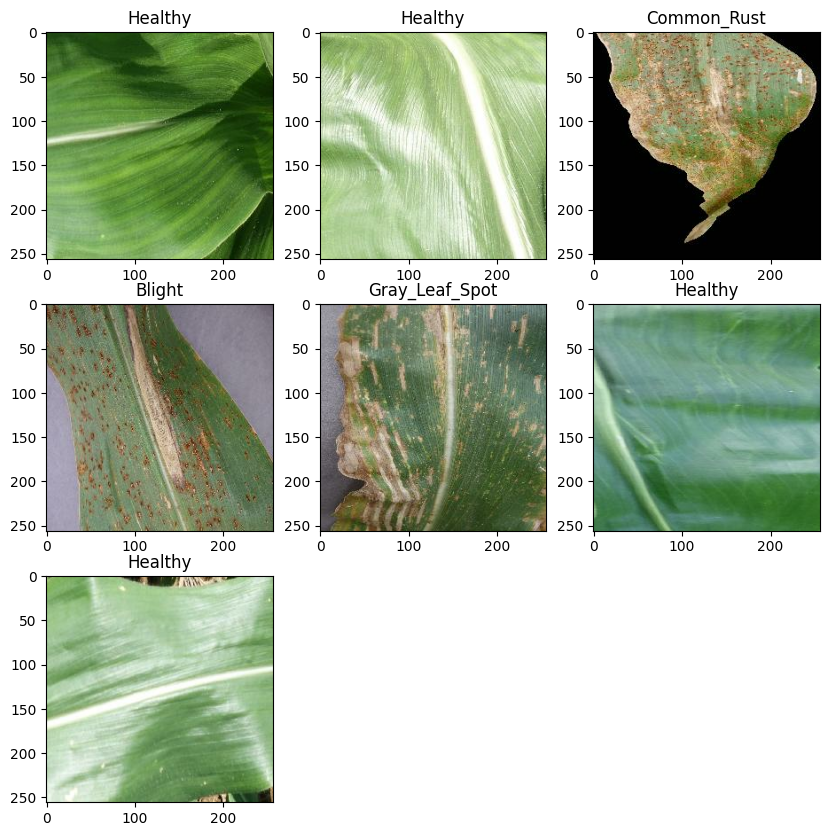

In [18]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  for i in range(7):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])

In [19]:
train_length = len(dataset) * 0.8
train_size = int(train_length)

train_ds = dataset.take(train_size)
print(len(train_ds))
test_ds = dataset.skip(train_size)
print(len(test_ds))
val_length=len(dataset)*0.1
val_size=int(val_length)
val_ds=test_ds.take(val_size)
print(len(val_ds))
test_ds=test_ds.skip(val_size)
print(len(test_ds))



104
27
13
14


In [20]:
def train_test_valid_split(dataset,train_size=0.8,test_size=0.10,val_size=0.10,shuffle=True,Buffer=1000):
  if shuffle:
    dataset=dataset.shuffle(Buffer)
  train_ds=dataset.take(int(len(dataset)*train_size))
  Temp_ds=dataset.skip(int(len(dataset)*train_size))
  test_ds=Temp_ds.take(int(len(dataset)*test_size))
  val_ds=Temp_ds.skip(int(len(dataset)*test_size))
  return train_ds,test_ds,val_ds

In [21]:
train_ds,test_ds,val_ds=train_test_valid_split(dataset)
print(len(train_ds))
print(len(test_ds))
print(len(val_ds))

104
13
14


In [22]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
resize_and_rescale=tf.keras.Sequential([
    tf.keras.layers.Resizing(Image_size,Image_size),
    tf.keras.layers.Rescaling(1.0/255)
])

In [24]:
data_augmentation=tf.keras.Sequential([
   tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2)
])

In [25]:
input_shape=(Batch_size,Image_size,Image_size,channels)
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(class_names),activation='softmax')
])
model.build(input_shape=input_shape)

In [26]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 2304)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 64)               │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 4)                │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,956 (1.06 MB)

 Trainable params: 277,956 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [28]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=Batch_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 613s 265ms/step - accuracy: 0.4706 - loss: 1.0856 - val_accuracy: 0.8103 - val_loss: 0.6971
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.8204 - loss: 0.4547 - val_accuracy: 0.8214 - val_loss: 0.5056
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.8368 - loss: 0.4287 - val_accuracy: 0.8237 - val_loss: 0.4515
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.8293 - loss: 0.4191 - val_accuracy: 0.8795 - val_loss: 0.3559
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.8459 - loss: 0.3647 - val_accuracy: 0.8795 - val_loss: 0.3882
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.8511 - loss: 0.3431 - val_accuracy: 0.8728 - val_loss: 0.3591
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.8449 - loss: 0.3592 - val_accuracy: 0.8705 - val_loss: 0.3878
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.8611 - loss: 0.3658 - val

Minimum Validation Loss: 0.1736


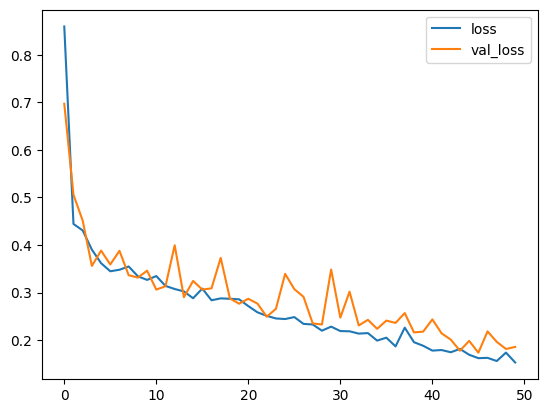

In [31]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [32]:
scores=model.evaluate(test_ds)

13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9535 - loss: 0.1039


Image to predict


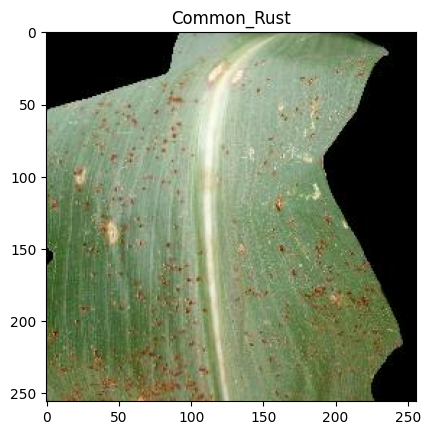

Image Label: Common_Rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
Prediction : [6.1566315e-11 1.0000000e+00 1.4725509e-17 3.7636172e-26]
Predicted Label: Common_Rust


In [33]:
import numpy as np
for image_batch,label_batch in test_ds.take(1):
    print("Image to predict")
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.show()
    print("Image Label:",class_names[label_batch[0]])
    batch_pred=model.predict(image_batch)
    print("Prediction :",batch_pred[0])
    print("Predicted Label:",class_names[np.argmax(batch_pred[0])])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


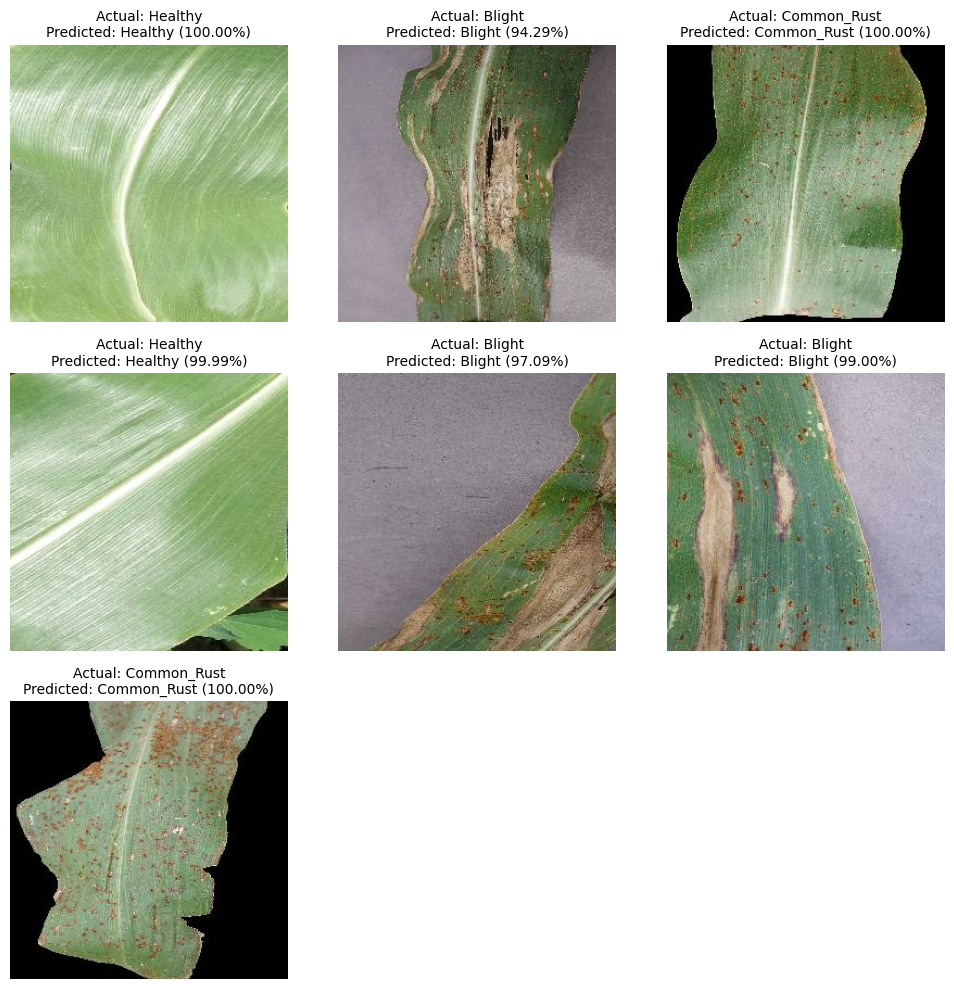

In [34]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in test_ds.take(1):
    batch_pred = model.predict(image_batch)
    for i in range(7):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')

        True_label = class_names[label_batch[i]]
        pred_idx = np.argmax(batch_pred[i])
        Predicted_label = class_names[pred_idx]
        Confidence = batch_pred[i][pred_idx]

        plt.title(
            f"Actual: {True_label}\n"
            f"Predicted: {Predicted_label} ({Confidence:.2%})",
            fontsize=10
        )
plt.tight_layout()
plt.show()


In [35]:
model.save("maize_disease_model.keras")
